In [1]:
### Download libraries
#%pip install uproot 
#%pip install awkward 
#%pip install mplhep 
#%pip install numpy 
#%pip install matplotlib 
#%pip install scipy
### Upgrade libraries to latest version
#%pip install uproot awkward mplhep numpy matplotlib scipy --upgrade

In [2]:
import uproot
import awkward as ak
import mplhep
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit

In [3]:
path_data = 'opal_data/mc/'
file = uproot.open(path_data+'ee.root')
ttree_name = 'myTTree'
file[ttree_name].keys()
branches = file[ttree_name].arrays()
## here, we can determine arbitrary the values of ee that we need..
var1 = 'Pcharged'
var2 = 'cos_thet'
var3 = 'E_ecal'
var4 = 'Ncharged'
var5 = 'E_hcal'
var6 = 'E_lep'
var7 = 'cos_thru'
## converting the ak arrays into np arrays
pchar = ak.to_numpy(branches[var1])
cos_theta = ak.to_numpy(branches[var2])
Ecal = ak.to_numpy(branches[var3])
nchar = ak.to_numpy(branches[var4])
Hcal = ak.to_numpy(branches[var5])
Elep = ak.to_numpy(branches[var6])
cos_thrust = ak.to_numpy(branches[var7])

# Plotting the four observables into histogramms

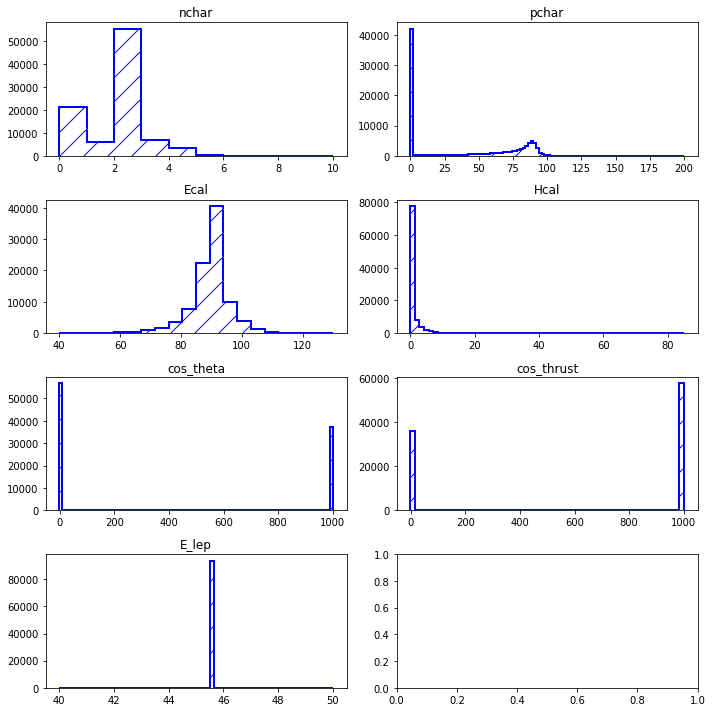

In [4]:
##comparing all Ecal(SumE)
#print(min(nchar),max(nchar))
#print(min(pchar),max(pchar))
#print(min(Ecal),max(Ecal))
#print(min(Hcal),max(Hcal))
#print(min(cos_theta),max(cos_theta))
#print(min(cos_thrust),max(cos_thrust))
fig, axs = plt.subplots(4, 2, figsize=(10,10))
axs[0,0].hist(nchar,bins=10,range=(0,10), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[0,0].set_title("nchar")
axs[0,1].hist(pchar,bins=100,range=(0,200), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[0,1].set_title("pchar")
axs[1,0].hist(Ecal,bins=20,range=(40,130), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[1,0].set_title("Ecal")
axs[1,1].hist(Hcal,bins=60,range=(0,85), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[1,1].set_title("Hcal")
axs[2,0].hist(cos_theta,bins=100,range=(-2,1001), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[2,0].set_title("cos_theta")
axs[2,1].hist(cos_thrust,bins=60,range=(-2,1001), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[2,1].set_title("cos_thrust")
axs[3,0].hist(Elep,bins=60,range=(40,50), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[3,0].set_title("E_lep")
fig.tight_layout()

# Useful dependencies

In [5]:
## 2D histogram for Ecal and cos_theta
#plt.style.use(mplhep.style.ATLAS) 
#plt.figure(figsize=(7,5))

#bin_content, bin_edges, _, _ = plt.hist2d(Ecal,cos_theta,bins=[1000,7],range=[[40.,125.],[-1.,1000.]])
#mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

#plt.xlabel('Ecal')
#plt.ylabel('cos_theta')
#plt.show()

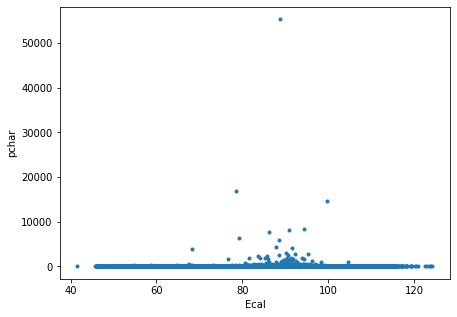

In [6]:
## Plot Ecal vs Pcharged
plt.figure(figsize=(7,5))
plt.plot(Ecal,pchar,'.')

plt.xlabel('Ecal')
plt.ylabel('pchar')
plt.show()

# Determine t-channel ee-decay rates

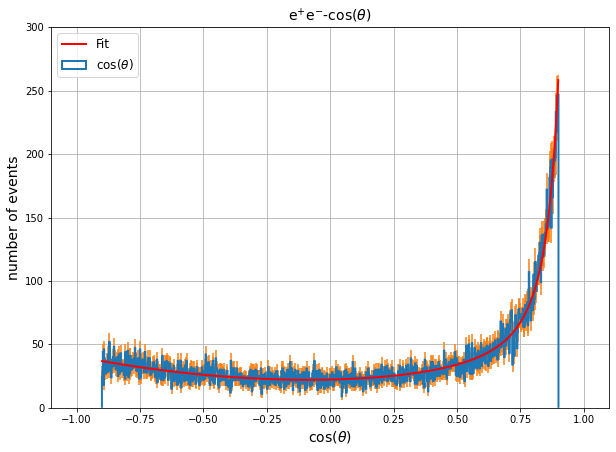

[20.02396117  2.26048465]


In [7]:
mynewmask = (branches['cos_thet'] <= 1.1) & (branches['cos_thet'] >= -0.9)

# Plot data with statistical uncertainties
plt.figure(figsize=(10,7))
new_bin_content, new_bin_edges, _ = plt.hist(cos_theta[mynewmask],bins=1000,range=(-0.9,0.90),  histtype='step', linewidth=2, label=r'cos($\theta$)')
new_mid = 0.5*(new_bin_edges[1:] + new_bin_edges[:-1]) #Calculate midpoint of the bars
new_error_sizes = np.sqrt(new_bin_content)

plt.errorbar(new_mid, new_bin_content, yerr=new_error_sizes, fmt='none')

### Show the plot on screen
plt.title(r'e$^{+}$e$^{-}$-cos($\theta$) ',fontsize=14)
plt.xlim(-1.1,1.1)
plt.xlabel(r'cos($\theta$)',fontsize=14)
plt.ylabel('number of events',fontsize=14)

# Define model function to be used to fit to the data above:
def dsigdcos(costheta,A,B): 
    return A*(1+(costheta**(2))) + B*((1-costheta)**(-2))
# p0 is the initial gu0ess for the fitting coefficients (A, mu and sigma above)
pint = [100, 10]

## Fit curve (WARNING: The fit does not propagate bin uncertainties to the uncertainties of the fit parameters!)
coeff, var_matrix = curve_fit(dsigdcos, new_mid, new_bin_content, p0=pint)
# Get the fitted curve
hist_fit = dsigdcos(new_mid, *coeff)

plt.plot(new_mid, hist_fit, label='Fit',color='red',linewidth=2)
plt.ylim(0,300)
plt.legend(loc='upper left',fontsize=12)
plt.grid()
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(coeff[1], abs(coeff[2])))
#plt.savefig('stchannelfit.pdf')
plt.show()
print(coeff)

In [8]:
#plt.plot(np.linspace(-1,1.1,1000),dsigdcos(np.linspace(-1,1.1,1000),200,7*10**(1)))
#plt.ylim(0,5000)
#plt.xlim(-1,1.1)

# Seperating the cos_theta <= 1 data and cos_theta > 1 (also splitting the other observables)

In [9]:
## cos_theta exists only in the range of [-1,1] and for [999,999]
print(len(cos_theta))
i=0
cos_theta_true = [] ## true defines the measured angles, false defines the angles which were not assigned to an event
cos_theta_false= []
Ecal_true = []
Ecal_false = []
nchar_true = []
nchar_false =[]
pchar_true = []
pchar_false = []
while i < 93802: 
    if cos_theta[i] < 2:
        x = cos_theta[i]
        y = Ecal[i]
        z = nchar[i]
        w = pchar[i]
        cos_theta_true.append(x)
        Ecal_true.append(y)
        nchar_true.append(z)
        pchar_true.append(w)
    else:
        x = cos_theta[i]
        y = Ecal[i]
        z = nchar[i]
        w = pchar[i]
        cos_theta_false.append(x)
        Ecal_false.append(y)
        nchar_false.append(z)
        pchar_false.append(w)
    i=i+1
        
print(len(cos_theta_true), len(cos_theta_false))
print(len(cos_theta_true)+len(cos_theta_false)) 

93802


56720 37082
93802


minimum and maximum of Ecal: 45.831955 and 124.320595
minimum and maximum of nchar: 0.0 and 9.0
minimum and maximum of pchar: 0.0 and 16836.207


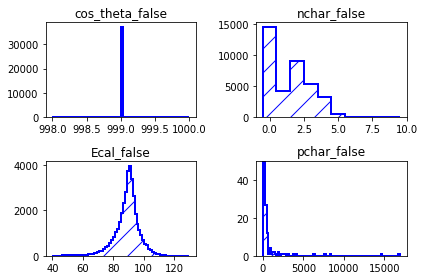

In [10]:
## investigating the cos_theta = 999 observables
print('minimum and maximum of Ecal:',min(Ecal_false),'and',max(Ecal_false))
print('minimum and maximum of nchar:',min(nchar_false),'and',max(nchar_false))
print('minimum and maximum of pchar:',min(pchar_false),'and',max(pchar_false))
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(cos_theta_false,bins=60,range=(998,1000), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[0, 0].set_title("cos_theta_false")
axs[1, 0].hist(Ecal_false,bins=70,range=(40,130), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[1, 0].set_title("Ecal_false")
axs[0, 1].hist(nchar_false,bins=10,range=(-0.5,9.5), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[0, 1].set_title("nchar_false")
axs[1, 1].hist(pchar_false,bins=100,range=(-0.5,16900), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[1, 1].set_title("pchar_false")
axs[1,1].set_ylim(0,50)
fig.tight_layout()

minimum and maximum of Ecal: 41.549213 and 123.75439
minimum and maximum of nchar: 0.0 and 5.0
minimum and maximum of pchar: 0.0 and 55299.59


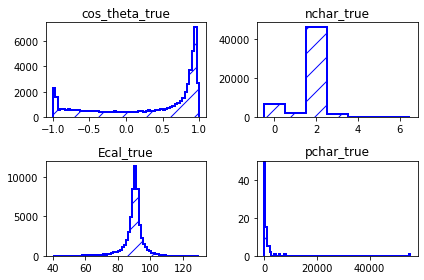

In [11]:
## investigating the cos_theta = [-1,1] observables
print('minimum and maximum of Ecal:',min(Ecal_true),'and',max(Ecal_true))
print('minimum and maximum of nchar:',min(nchar_true),'and',max(nchar_true))
print('minimum and maximum of pchar:',min(pchar_true),'and',max(pchar_true))
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(cos_theta_true,bins=60,range=(-1,1), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[0, 0].set_title("cos_theta_true")
axs[1, 0].hist(Ecal_true,bins=70,range=(40,130), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[1, 0].set_title("Ecal_true")
axs[0, 1].hist(nchar_true,bins=7,range=(-0.5,6.5), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[0, 1].set_title("nchar_true")
axs[1, 1].hist(pchar_true,bins=100,range=(-0.5,55400), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[1, 1].set_title("pchar_true")
axs[1,1].set_ylim(0,50)
fig.tight_layout() ## we see that the only significant difference is the nchar for both events. Thus, we can use all the cos_theta data always if we dont have to calculate something with nchar, rigth?!

In [12]:
## is it maybe the case that we the null is very often included in the pchar data because we cant cover the small angles (zylindrical setup), and since most counts appear exactly in that range (see cos_theta) thus we cant measure most pcharges due to not covering the top and bottom of the zylinder..??

# Applying the cut(s)

0.0 9.0


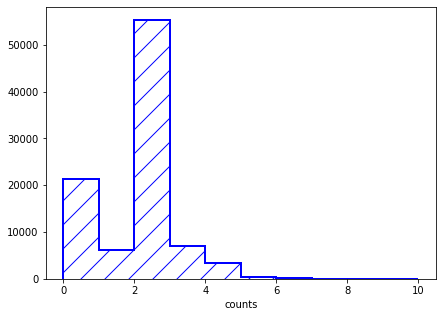

In [13]:
## does mc look like we expected from the Grope simulator?
print(min(nchar),max(nchar))
plt.figure(figsize=(7,5))
bin_content, bin_edges, _= plt.hist(nchar,bins=10,range=(0,10), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
plt.xlabel('counts')
#plt.xlim(0,100)
plt.show() ## the awnser is definetly yesno because from [20,60] it is as expected but for < 20 there are still 'a lot' of counts

In [14]:
def dsigdcos1(costheta,A): 
    return A*(1+(costheta**(2)))
def dsigdcos2(costheta,B):
    return B*((1-costheta)**(-2))

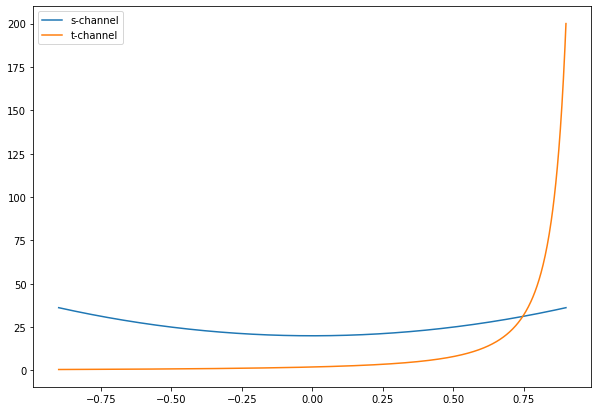

In [15]:
A1=20
B1=2
plt.figure(figsize=(10,7))
plt.plot(np.linspace(-0.9,0.9,1000),dsigdcos1(np.linspace(-0.9,0.9,1000),A1), label='s-channel')
plt.plot(np.linspace(-0.9,0.9,1000),dsigdcos2(np.linspace(-0.9,0.9,1000),B1), label='t-channel')
plt.legend()
#plt.ylim(0,10)